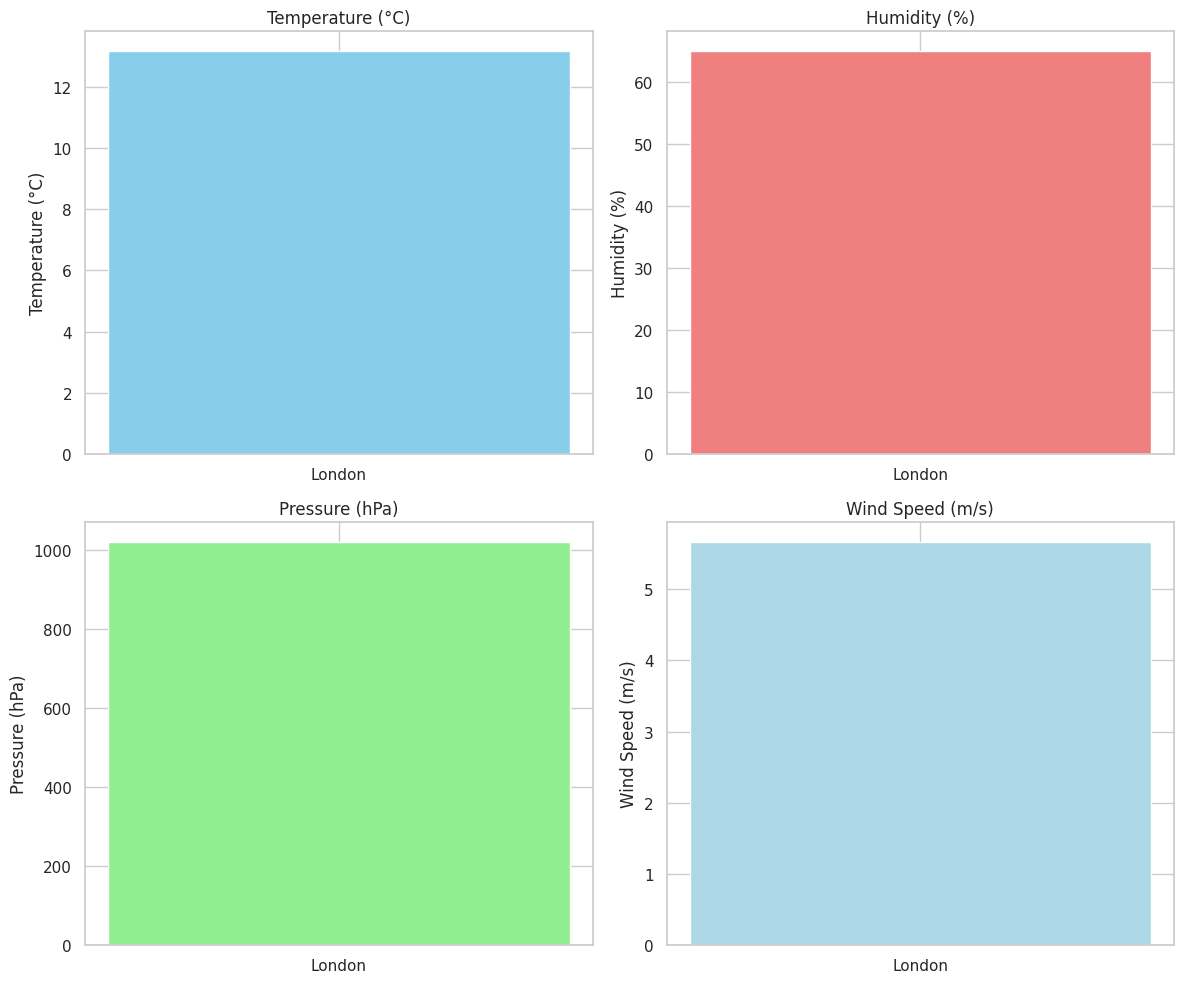

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up your OpenWeatherMap API key and the city for which you want the weather data
API_KEY = '6532604df809792ae184ce31bfd8a940'  # Replace with your OpenWeatherMap API Key
CITY = 'London'  # You can change the city name as per your needs
BASE_URL = 'http://api.openweathermap.org/data/2.5/weather'

# Function to fetch data from OpenWeatherMap API
def fetch_weather_data(city, api_key):
    params = {
        'q': city,
        'appid': api_key,
        'units': 'metric'  # For temperature in Celsius
    }
    response = requests.get(BASE_URL, params=params)
    data = response.json()
    return data

# Function to extract relevant weather information
def extract_weather_info(data):
    weather_info = {
        'city': data['name'],
        'temperature': data['main']['temp'],
        'humidity': data['main']['humidity'],
        'pressure': data['main']['pressure'],
        'weather_description': data['weather'][0]['description'],
        'wind_speed': data['wind']['speed']
    }
    return weather_info

# Fetch data
weather_data = fetch_weather_data(CITY, API_KEY)
weather_info = extract_weather_info(weather_data)

# Convert the weather data into a pandas DataFrame for visualization
weather_df = pd.DataFrame([weather_info])

# Set up the visualization
sns.set(style="whitegrid")

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Temperature Plot
axs[0, 0].bar(weather_df['city'], weather_df['temperature'], color='skyblue')
axs[0, 0].set_title('Temperature (°C)')
axs[0, 0].set_ylabel('Temperature (°C)')

# Humidity Plot
axs[0, 1].bar(weather_df['city'], weather_df['humidity'], color='lightcoral')
axs[0, 1].set_title('Humidity (%)')
axs[0, 1].set_ylabel('Humidity (%)')

# Pressure Plot
axs[1, 0].bar(weather_df['city'], weather_df['pressure'], color='lightgreen')
axs[1, 0].set_title('Pressure (hPa)')
axs[1, 0].set_ylabel('Pressure (hPa)')

# Wind Speed Plot
axs[1, 1].bar(weather_df['city'], weather_df['wind_speed'], color='lightblue')
axs[1, 1].set_title('Wind Speed (m/s)')
axs[1, 1].set_ylabel('Wind Speed (m/s)')

# Layout Adjustment
plt.tight_layout()
plt.show()